# AI Course Homework: Machine Learning Fundamentals

This notebook provides hands-on experience with key machine learning concepts: **Naive Bayes**, **Decision Trees**, **Regression (Polynomial and Logistic)**, **Neural Networks** and **CNN**. You'll implement algorithms from scratch and apply them to datasets to deepen your understanding. The notebook is divided into five sections, each with a theoretical overview and practical exercises.

**Instructions:**
- Complete all sections in the code and answer the questions.
- Submit the notebook with all code cells executed and outputs visible.
- Use `numpy` for basic operations, but implement core algorithm logic yourself where indicated



## Sections
1. **Naive Bayes**
2. **Decision Trees**
3. **Regression (Polynomial and Logistic)**
4. **Neural Networks (Perceptron and Multi-Layer Perceptron)**
5. **CNN From Scratch!**

In [ ]:
Name="Pardis Moradi"
Student_Number="402106489"

## Section 1: Naive Bayes

### Theoretical Overview
**Naive Bayes** is a probabilistic classifier that assumes features are conditionally independent given the class label, using Bayes' theorem:

$$ P(Y | F_1, ..., F_n) \propto P(Y) \prod_{i} P(F_i | Y) $$

Here, you'll implement Naive Bayes for spam classification.

### Practical Exercise: Implementing Naive Bayes
**Dataset:** Emails labeled 'spam' or 'ham' with binary features 'free' and 'money'.

| free | money | label |
|------|-------|-------|
| 1    | 0     | spam  |
| 0    | 1     | spam  |
| 0    | 0     | ham   |
| 1    | 1     | spam  |
| 0    | 0     | ham   |

**Tasks:**
1. Calculate prior probabilities $ P(\text{spam}) $ and $ P(\text{ham}) $.
2. Calculate conditional probabilities with Laplace smoothing ($ k=1 $): $ P(\text{free}=1 | \text{spam}) $, $ P(\text{free}=1 | \text{ham}) $, $ P(\text{money}=1 | \text{spam}) $, $ P(\text{money}=1 | \text{ham}) $.
3. Predict the label for a new email: $ \text{free}=1 $, $ \text{money}=0 $.

**Questions:**
- Why is Laplace smoothing important?
  - **Answer:** Because in a small training set, some events may last unseen but this shouldn't make their probability to be zero. Laplace Smoothing helps diminishing these zero probabilities and therefore prevents model from overfitting.
- How does feature independence affect performance?
  - **Answer:** Because Naive Bayes assumes features are independent given the class, it simplifies computation and works surprisingly well even if this assumption isn't true. However, when features are actually correlated, the model can become biased or overconfident, which may hurt performance. Still, the assumption helps the model stay simple and generalize better in many practical cases.

In [3]:
import numpy as np

# Toy dataset
data = np.array([
    [1, 0, 'spam'],
    [0, 1, 'spam'],
    [0, 0, 'ham'],
    [1, 1, 'spam'],
    [0, 0, 'ham']
])
X = data[:, :-1].astype(int)
y = data[:, -1]

# Calculate prior probabilities
total = len(y)
p_spam = 0.6
p_ham = 0.4
print(f'P(spam) = {p_spam}, P(ham) = {p_ham}')

# Calculate conditional probabilities with Laplace smoothing
def conditional_prob(feature_idx, value, label, X, y, k=1):
    prob, tot = 0, 0
    for i in range(total):
        if y[i] == label:
            tot += 1
            if X[i][feature_idx] == value:
                prob += 1
    
    # Laplace Smoothing
    prob += k
    tot += 2 * k

    return 1.0 * prob / tot

p_free1_spam = conditional_prob(0, 1, 'spam', X, y)
p_free1_ham = conditional_prob(0, 1, 'ham', X, y)
p_money1_spam = conditional_prob(1, 1, 'spam', X, y)
p_money1_ham = conditional_prob(1, 1, 'ham', X, y)
print(f'P(free=1|spam) = {p_free1_spam}, P(free=1|ham) = {p_free1_ham}')
print(f'P(money=1|spam) = {p_money1_spam}, P(money=1|ham) = {p_money1_ham}')

# Predict for new email
new_email = np.array([1, 0])
p_spam_ = p_spam * p_free1_spam * (1 - p_money1_spam)
p_ham_ = p_ham * p_free1_ham * (1 - p_money1_ham)
p_spam_norm = p_spam_ / (p_spam_ + p_ham_)
p_ham_norm = p_ham_ / (p_spam_ + p_ham_)
prediction = 'spam' if p_spam_norm > p_ham_norm else 'ham'
print(f'P(spam|free=1, money=0) = {p_spam_norm}, P(ham|free=1, money=0) = {p_ham_norm}')
print(f'Prediction: {prediction}')

P(spam) = 0.6, P(ham) = 0.4
P(free=1|spam) = 0.6, P(free=1|ham) = 0.25
P(money=1|spam) = 0.6, P(money=1|ham) = 0.25
P(spam|free=1, money=0) = 0.6575342465753424, P(ham|free=1, money=0) = 0.34246575342465757
Prediction: spam


## Section 2: Decision Trees

### Theoretical Overview
**Decision Trees** split data based on features to maximize **information gain**:

$$ IG(X_i) = H(Y) - H(Y | X_i) $$
$$ H(Y) = -\sum_c P(Y=c) \log_2 P(Y=c) $$

where $ H $ is entropy. Overfitting is a risk, addressed by pruning.

### Practical Exercise: Implementing a Decision Tree
**Dataset:** Features $ \text{age} $ (young/old), $ \text{income} $ (low/high), $ \text{student} $ (yes/no), and label $ \text{buys\_product} $ (yes/no).

| age   | income | student | buys_product |
|-------|--------|---------|--------------|
| young | high   | no      | no           |
| young | high   | yes     | yes          |
| old   | high   | no      | yes          |
| old   | low    | yes     | yes          |
| young | low    | no      | no           |
| old   | low    | no      | no           |
| young | low    | yes     | yes          |
| old   | high   | yes     | yes          |

**Tasks:**
1. Implement entropy calculation.
2. Implement information gain calculation.
3. Build a tree with a max depth of 3, splitting on the highest information gain.
4. Apply pruning: stop splitting if gain < 0.1.
5. Predict for $ \text{age}=\text{young} $, $ \text{income}=\text{low} $, $ \text{student}=\text{no} $.

**Questions:**
- Why was a feature chosen for the root?
  - **Answer:** Because it provided the highest information gain among all features, meaning it best reduced uncertainty about the target label. Choosing such a feature ensures the first split separates the data in the most informative way, guiding the tree toward more accurate decisions.
- How does pruning prevent overfitting?
  - **Answer:** Because it stops the tree from splitting on features that add very little new information. Small information gains often come from noise or specific examples, which can lead the tree to memorize the training data. Pruning avoids this by enforcing a threshold, helping the model generalize better to unseen data.

In [5]:
import numpy as np

# Toy dataset
data = np.array([
    ['young', 'high', 'no', 'no'],
    ['young', 'high', 'yes', 'yes'],
    ['old', 'high', 'no', 'yes'],
    ['old', 'low', 'yes', 'yes'],
    ['young', 'low', 'no', 'no'],
    ['old', 'low', 'no', 'no'],
    ['young', 'low', 'yes', 'yes'],
    ['old', 'high', 'yes', 'yes']
])
X = data[:, :-1]
y = data[:, -1]

# Entropy calculation
def entropy(labels):
    values, counts = np.unique(labels, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs + 1e-9))  # Add small epsilon to avoid log(0)
    

H_y = entropy(y)
print(f'Entropy of buys_product: {H_y}')

# Information gain calculation
def info_gain(feature_idx, X, y):
    values, counts = np.unique(X[:, feature_idx], return_counts=True)

    weighted_entropy = 0
    for v, count in zip(values, counts):
        subset_y = y[X[:, feature_idx] == v]
        weighted_entropy += (count / len(y)) * entropy(subset_y)

    return entropy(y) - weighted_entropy

# Decision Tree Node
class TreeNode:
    def __init__(self, feature=None, value=None, left=None, right=None, label=None):
        self.feature = feature
        self.value = value
        self.left = left
        self.right = right
        self.label = label

# Build Decision Tree
def build_tree(X, y, depth=0, max_depth=3, min_gain=0.1):
    if depth == max_depth:
        leaf = TreeNode(label= y[0])
        return leaf

    gains = [info_gain(idx, X, y) for idx in range(len(X[0]))]
    splitting_idx = np.argmax(gains)

    if gains[splitting_idx] < min_gain:
        values, counts = np.unique(y, return_counts=True)
        return TreeNode(label=values[np.argmax(counts)])

    domain = np.unique(X[:, splitting_idx])
    left_indices = X[:, splitting_idx] == domain[0]
    right_indices = X[:, splitting_idx] != domain[0]

    X_left = np.delete(X[left_indices], splitting_idx, axis=1)
    X_right = np.delete(X[right_indices], splitting_idx, axis=1)
    y_left = y[left_indices]
    y_right = y[right_indices]
    
    node = TreeNode(feature= splitting_idx)
    node.left = build_tree(X_left, y_left, depth + 1)
    node.right = build_tree(X_right, y_right, depth + 1)
    node.left.value = domain[0]
    node.right.value = domain[1]

    return node



# Predict
def predict(tree, x):
    if tree.label is None:
        value = x[tree.feature]
        if tree.left.value == value:
            tree = tree.left
        else:
            tree = tree.right
        return predict(tree, x)
    return tree.label

# Build and predict
tree = build_tree(X, y)
new_instance = ['young', 'low', 'no']
prediction = predict(tree, new_instance)
print(f'Prediction for young, low, no: {prediction}')

Entropy of buys_product: 0.9544340000395749
Prediction for young, low, no: no


## Section 3: Regression (Polynomial and Logistic)

### Theoretical Overview
**Polynomial Regression** fits continuous outcomes:

$$ y(x, \mathbf{w}) = \sum_{j=0}^{M} w_j x^j $$
- **Error:** $ E(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^{N} (y(x_n, \mathbf{w}) - t_n)^2 $
- **Regularization:** Adds $ \frac{\lambda}{2} ||\mathbf{w}||^2 $ to prevent overfitting.

**Logistic Regression** predicts class probabilities:

$$ P(Y=1 | X) = \frac{1}{1 + \exp(-(\mathbf{w}^T X + b))} $$
- **Loss:** Cross-entropy.

### Practical Exercise: Polynomial and Logistic Regression
**Tasks:**
1. Fit polynomial regression (degrees 1, 3, 9) to a synthetic dataset and plot.
2. Apply Ridge regularization to degree 9 ($ \lambda = 0.01 $) and plot.
3. Implement logistic regression with gradient descent on the Decision Tree dataset.
4. Compare polynomial and logistic regression on the classification task.

**Questions:**
- Why does degree 9 overfit?
  - **Answer:** Because training set is not so big and degree 9 has enough capacity and degree of freedom that it can fit all the training set samples which results in capturing noises alongside the general pattern as well and therefore leads to overfitting.
- How does regularization help?
  - **Answer:** Because it penalizes large weights, which are often a sign that the model is trying too hard to fit every training point exactly. By adding this penalty, regularization discourages overly complex models and helps the model focus more on the overall trend rather than the noise, which improves generalization to new data.

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Polynomial Regression
np.random.seed(0)
X_poly = np.linspace(0, 1, 10).reshape(-1, 1)
y_poly = np.sin(2 * np.pi * X_poly).ravel() + np.random.normal(0, 0.1, 10)

def polynomial_features(X, degree):
    X_poly = np.ones((X.shape[0], 1))
    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X ** d))
    return X_poly

def fit_polynomial(X_poly, y, lambda_reg=0):
    I = np.eye(X_poly.shape[1])
    w = np.linalg.inv(X_poly.T @ X_poly + lambda_reg * I) @ X_poly.T @ y
    return w

def predict(X_poly, w):
    return X_poly @ w

def sse(y_true, y_pred):
    return np.linalg.norm(y_true - y_pred)

# Polynomial fits
degrees = [1, 3, 9]
plt.figure(figsize=(12, 4))
X_test = np.linspace(0, 1, 100).reshape(-1, 1)
for i, deg in enumerate(degrees, 1):
    X_poly_train = polynomial_features(X_poly, deg)
    w = fit_polynomial(X_poly_train, y_poly)
    y_pred = predict(X_poly_train, w)
    X_test_poly = polynomial_features(X_test, deg)
    y_test_pred = predict(X_test_poly, w)
    error = sse(y_poly, y_pred)
    plt.subplot(1, 4, i)
    plt.scatter(X_poly, y_poly, color='blue', label='Data')
    plt.plot(X_test, y_test_pred, 'r-', label=f'Degree {deg}')
    plt.title(f'Degree {deg}, SSE={error:.2f}')
    plt.legend()

# Regularized degree 9
X_poly_9 = polynomial_features(X_poly, 9)
w_reg = fit_polynomial(X_poly_9, y_poly, lambda_reg=0.01)
y_pred_reg = predict(X_poly_9, w_reg)
X_test_poly_9 = polynomial_features(X_test, 9)
y_test_pred_reg = predict(X_test_poly_9, w_reg)
error_reg = sse(y_poly, y_pred_reg)
plt.subplot(1, 4, 4)
plt.scatter(X_poly, y_poly, color='blue', label='Data')
plt.plot(X_test, y_test_pred_reg, 'g-', label='Deg 9 Reg')
plt.title(f'Degree 9 Reg, SSE={error_reg:.2f}')
plt.legend()
plt.tight_layout()
plt.savefig('regression_plots.png')
plt.close()

# Logistic Regression
X_log = np.array([
    [0, 0, 0],  # young, high, no
    [0, 0, 1],  # young, high, yes
    [1, 0, 0],  # old, high, no
    [1, 1, 1],  # old, low, yes
    [0, 1, 0],  # young, low, no
    [1, 1, 0],  # old, low, no
    [0, 1, 1],  # young, low, yes
    [1, 0, 1]   # old, high, yes
])
y_log = np.array([0, 1, 1, 1, 0, 0, 1, 1])

def sigmoid(z, bias):
    return 1.0 / (1 + np.exp(z + bias))

def logistic_regression(X, y, lr=0.1, epochs=1000):
    w = [0.0 for _ in range(len(X[0]))]
    bias = 0.0
    for _ in range(epochs):
        for i in range(len(X)):
            y_predicted = 1 if sigmoid(np.dot(X[i], w), bias) else 0
            w += lr * (y_predicted - y[i]) * X[i]
            bias += lr * (y_predicted - y[i])

    return w, bias


w_log, bias = logistic_regression(X_log, y_log)
new_instance_log = np.array([0, 1, 0])
prob = sigmoid(np.dot(new_instance_log, w_log), bias)
prediction_log = 1 if prob > 0.5 else 0
print(f'Logistic Regression prediction for young, low, no: {prediction_log}')

Logistic Regression prediction for young, low, no: 0


## Section 4: Neural Networks (Perceptron and Multi-Layer Perceptron)

### Theoretical Overview
**Perceptron:** A linear classifier.
**Multi-Layer Perceptron (MLP):** Adds hidden layers for non-linear problems.

### Practical Exercise: Implementing Perceptron and MLP
**Dataset:**
| $x_1$ | $x_2$ | $y$ |
|----|----|---|
| 0  | 0  | 0 |
| 0  | 1  | 1 |
| 1  | 0  | 1 |
| 1  | 1  | 0 |

**Tasks:**
1. Implement and train a perceptron.
2. Implement and train an MLP with 2 hidden units.
3. Compare their performance.

**Questions:**
- Why can't the perceptron solve XOR?
  - **Answer:** Because XOR is non-linear and a single perceptron can only implement linear hypothesis space.
- How does the MLP help?
  - **Answer:** By adding hidden layers in MLP, non-linear functions can be implemented as well. So it can capture XOR pattern.

In [37]:
import numpy as np

# Dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Perceptron
class Perceptron:
    def __init__(self):
        self.w = np.zeros(3)
    
    def predict(self, x):
        x_aug = np.insert(x, 0, 1)  # Add bias term (1) at index 0
        return 1 if np.dot(x_aug, self.w) > 0 else 0
    
    def train(self, X, y, epochs=10):
        for _ in range(epochs):
            for i in range(len(X)):
                y_predicted = self.predict(X[i])
                error = y[i] - y_predicted
                x_aug = np.insert(X[i], 0, 1)
                self.w += error * x_aug

perceptron = Perceptron()
perceptron.train(X, y)
print('Perceptron predictions:', [perceptron.predict(x) for x in X])

# MLP
class MLP:
    def __init__(self, hidden_size=2, lr=0.5):
        self.lr = lr
        self.W1 = np.random.randn(2, hidden_size) * 0.1
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, 1) * 0.1
        self.b2 = np.zeros(1)
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_deriv(self, x):
        s = self.sigmoid(x)
        return s * (1 - s)

    def forward(self, X):
        self.z1 = X @ self.W1 + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = self.a1 @ self.W2 + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def train(self, X, y, epochs=10000):
        y = y.reshape(-1, 1)
        for _ in range(epochs):
            output = self.forward(X)
            d_z2 = (output - y) * self.sigmoid_deriv(self.z2)
            d_W2 = self.a1.T @ d_z2
            d_b2 = np.sum(d_z2, axis=0)
            d_a1 = d_z2 @ self.W2.T
            d_z1 = d_a1 * self.sigmoid_deriv(self.z1)
            d_W1 = X.T @ d_z1
            d_b1 = np.sum(d_z1, axis=0)

            self.W2 -= self.lr * d_W2
            self.b2 -= self.lr * d_b2
            self.W1 -= self.lr * d_W1
            self.b1 -= self.lr * d_b1

    def predict(self, X):
        output = self.forward(X)
        return (output >= 0.5).astype(int)

mlp = MLP()
mlp.train(X, y)
print('MLP predictions:', mlp.predict(X).flatten())

Perceptron predictions: [1, 1, 0, 0]
MLP predictions: [0 1 1 0]


## Section 5: CNN From Scratch!


__CNN__ s are powerfull tools to work with in the scope of _Computer Vision_. You have seen MLPs before and know how to do forward and backward pass on them. In this part, we want to create a convolutional layer (a simple one, of course!) just to understand well that how a Convolutional Layer works, behind the scenes. You can read more about Convolutional Neural Networks in this [Link](https://medium.com/thedeephub/convolutional-neural-networks-a-comprehensive-guide-5cc0b5eae175)



__FORWARD PASS__:

In forward pass, you should apply the convolution operation on the input image. The convolution operation is as follows:

$$
\text{output}[i, j] = \sum_{k=0}^{K-1} \sum_{l=0}^{L-1} \text{input}[i+k, j+l] \times \text{kernel}[k, l]
$$

You can see a sample convolution operation (with a $3 \times 3$ kernel) in the following image:
<div style="text-align:center;">
  <img src="./Images/Conv.gif" /> 
</div>

Please note that, these are samples for you to understand the operation better. For _forward pass_ that you should implement, please notice that you should convolve the kernel along all $C$ channels of the input image. So, the output shape should be $(N, H_{out}, W_{out})$. These values are calculated as follows:

$$
H_{out} = \frac{H_{in} + 2 \times \text{padding}}{\text{stride} - HH} + 1
$$
$$
W_{out} = \frac{W_{in} + 2 \times \text{padding}}{\text{stride} - WW} + 1
$$


where $HH$ and $WW$ are the height and width of the kernel, respectively. __stride__ is the step size of the kernel, and __padding__ is the number of zeros that should be padded to the input image. Please also note that $b$ stands for bias, which is a scalar value that should be added to the output of the convolution operation. (for each kernel)

You can see a more detailed example, below:

<div style="text-align:center;">
  <img src="./Images/conv3.gif" /> 
</div>




__Backward Pass__:

In backward pass, you should calculate gradient of output with respect to the input image and the kernel. These gradients will be used in _optimization_ to update kernel weights. (You saw something similar, in using MLPs with gradient descent algorithm!). So, we need $d_x$, $d_w$ and $d_b$ in the backward pass. These are calculated as follows:

$$
dx_{padded} [n, :, i * stride: i * stride + HH, j * stride: j * stride + WW] += w[f] \times dout[n, f, i, j]
$$

$$
dw_{f} = \sum_{n=0}^{N - 1} \sum_{i=0}^{H_{out} - 1} \sum_{j=0}^{W_{out} - 1} x_{padded}[n, :, i * stride: i * stride + HH, j * stride: j * stride + WW] \times dout[n, f, i, j]  
$$

$$
db_{f} = \sum_{n=0}^{N - 1} \sum_{i=0}^{H_{out} - 1} \sum_{j=0}^{W_{out} - 1} dout[n, f, i, j]
$$

For better understanding of the backward pass, you can see the following image:

<div style="text-align:center;">
  <img src="./Images/backprop_cs231n.png" />
</div>


In [13]:
import numpy as np


class MyConv:
    def __init__(self, stride, padding):
        self.stride = stride
        self.padding = padding

    def forward(self, x, w, b):
        out = None

        ####### TO DO : Implement Forward pass of Conv2D #######
        ########################################################

        N, C, H, W = x.shape[0], x.shape[1], x.shape[2], x.shape[3]
        F, C, HH, WW = w.shape[0], w.shape[1], w.shape[2], w.shape[3]
        pad = self.padding
        stride = self.stride
        H_out = (H + 2 * pad - HH) // stride + 1
        W_out = (W + 2 * pad - WW) // stride + 1

        x_pad = np.pad(x, ((0, 0), (0, 0), (pad, pad), (pad, pad)), mode='constant')
        out = np.zeros((N, F, H_out, W_out))

        for n in range(N):
            for f in range(F):
                for k in range(H_out):
                    for l in range(W_out):
                        h_start = k * stride
                        h_end = h_start + HH
                        w_start = l * stride
                        w_end = w_start + WW

                        x_slice = x_pad[n, :, h_start:h_end, w_start:w_end]
                        out[n, f, k, l] = np.sum(x_slice * w[f]) + b[f]

        ####### TO DO : End #######
        #############################

        cache = (x, w, b, x_pad)
        self.cache = cache
        return out

    def backward(self, dout):
        dx, dw, db = None, None, None

        x, w, b, x_padded = self.cache

        ####### TO DO : Implement backward pass #######
        ###############################################

        N, C, H, W = x.shape
        F, C, HH, WW = w.shape
        N, F, H_OUT, W_OUT = dout.shape

        dw = np.zeros_like(w)
        dx_padded = np.zeros_like(x_padded)
        db = np.zeros_like(b)

        for n in range(N):
            for f in range(F):
                for i in range(H_OUT):
                    for j in range(W_OUT):
                        h_start = i * self.stride
                        h_end = h_start + HH
                        w_start = j * self.stride
                        w_end = w_start + WW
                        x_slice = x_padded[n, :, h_start:h_end, w_start:w_end]

                        dw[f] += x_slice * dout[n, f, i, j]
                        dx_padded[
                            n,
                            :,
                            i * self.stride : i * self.stride + HH,
                            j * self.stride : j * self.stride + WW,
                        ] += w[f] * dout[n, f, i, j]
                        db[f] += dout[n, f, i, j]

        dx = dx_padded if self.padding == 0 else dx_padded[:, :, self.padding:-self.padding, self.padding:-self.padding]

        ####### TO DO : End #######
        #############################

        self.dx = dx
        self.dw = dw
        self.db = db
        return dx, dw, db

In [4]:
##### DO NOT CHANGE ######
def rel_error(x, y):
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [9]:
# A simple test for forward pass (DO NOT CHANGE)

x_shape = (2, 3, 4, 4)
w_shape = (3, 3, 4, 4)
x = np.linspace(-0.1, 0.5, num=np.prod(x_shape)).reshape(x_shape)
w = np.linspace(-0.2, 0.3, num=np.prod(w_shape)).reshape(w_shape)
b = np.linspace(-0.1, 0.2, num=3)

out = MyConv(stride=2, padding=1).forward(x, w, b)
correct_out = np.array([[[[[-0.08759809, -0.10987781],
                           [-0.18387192, -0.2109216 ]],
                          [[ 0.21027089,  0.21661097],
                           [ 0.22847626,  0.23004637]],
                          [[ 0.50813986,  0.54309974],
                           [ 0.64082444,  0.67101435]]],
                         [[[-0.98053589, -1.03143541],
                           [-1.19128892, -1.24695841]],
                          [[ 0.69108355,  0.66880383],
                           [ 0.59480972,  0.56776003]],
                          [[ 2.36270298,  2.36904306],
                           [ 2.38090835,  2.38247847]]]]])

# The outputted difference which is printed, should be around 1e-8
print ('Testing conv_forward_naive')
print ('difference: ', rel_error(out, correct_out))

Testing conv_forward_naive
difference:  2.2121476417505994e-08


In [11]:
def eval_numerical_gradient_array(f, x, df, h=1e-5):
  grad = np.zeros_like(x)
  it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
  while not it.finished:
    ix = it.multi_index
    
    oldval = x[ix]
    x[ix] = oldval + h
    pos = f(x).copy()
    x[ix] = oldval - h
    neg = f(x).copy()
    x[ix] = oldval
    
    grad[ix] = np.sum((pos - neg) * df) / (2 * h)
    it.iternext()
  return grad

In [14]:
# A simple test for backward pass (DO NOT CHANGE)

x = np.random.randn(4, 3, 5, 5)
w = np.random.randn(2, 3, 3, 3)
b = np.random.randn(
    2,
)
dout = np.random.randn(4, 2, 5, 5)
conv = MyConv(stride=1, padding=1)

dx_num = eval_numerical_gradient_array(
    lambda x: conv.forward(x, w, b), x, dout
)
dw_num = eval_numerical_gradient_array(
    lambda w: conv.forward(x, w, b), w, dout
)
db_num = eval_numerical_gradient_array(
    lambda b: conv.forward(x, w, b), b, dout
)

out = conv.forward(x, w, b)
dx, dw, db = conv.backward(dout)

# Your printed errors should be around 1e-9
print("Testing conv_backward_naive function")
print("dx error: ", rel_error(dx, dx_num))
print("dw error: ", rel_error(dw, dw_num))
print("db error: ", rel_error(db, db_num))

Testing conv_backward_naive function
dx error:  6.392611098119101e-10
dw error:  7.178375448803455e-10
db error:  2.8591013174534403e-11


In this part, we try to visualize the results of the convolution operation. We will 2 sample photos (in `Images/Sample`) and then we will use our `MyConv` class to apply some cool convolutions (and see their result on an image).

In [17]:
from PIL import Image

first_img, second_img = Image.open("./Sample/image_1.jpg"), Image.open(
    "./Sample/image_2.jpg"
)
first_img = first_img.resize((256, 256))
second_img = second_img.resize((256, 256))

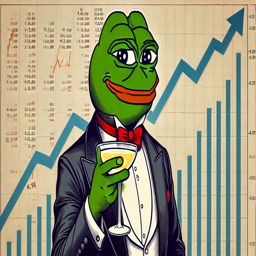

In [18]:
first_img

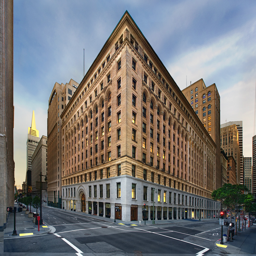

In [19]:
second_img

Convolutions have some interesting usages in image processing. For example, you can extract edges from an image by applying a convolution with a kernel that detects edges. Or you can convolve a specific kernel with your image to make it grayscale or blurred! Look at the definitions below:

__Edge Detection Kernel__:

_Sobel_ is one of the most famous edge detection kernels. It has two kernels, one for detecting vertical edges and the other for horizontal edges. You can see the kernels below:
$$
\text{Sobel}_x = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}
$$

$$
\text{Sobel}_y = \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
$$


__Grayscale Kernel__:

You can simply convolve the image with the following kernel to make it grayscale:

$$
\text{Grayscale\_across\_R} = \begin{bmatrix}
0 & 0 & 0 \\
0 & 0.3 & 0 \\
0 & 0 & 0
\end{bmatrix}
$$

$$
\text{Grayscale\_across\_G} = \begin{bmatrix}
0 & 0 & 0 \\
0 & 0.6 & 0 \\
0 & 0 & 0
\end{bmatrix}
$$

$$
\text{Grayscale\_across\_B} = \begin{bmatrix}
0 & 0 & 0 \\
0 & 0.1 & 0 \\
0 & 0 & 0
\end{bmatrix}
$$

(Convolve each kernel with its corresponding channel)

__Blurring Kernel__:

One of the famous kernels to blur an image is _Gaussian Blur_. You can see the kernel below:

$$
\text{Gaussian\_Blur} = \frac{1}{16} \times \begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{bmatrix}
$$


In [20]:
img_size = 256

x = np.zeros((2, 3, img_size, img_size))
x[0] = np.array(first_img).transpose(2, 0, 1)
x[1] = np.array(second_img).transpose(2, 0, 1)

# a convolution weight, holding 4 filters 3x3
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

grayscale_R = np.array([[0, 0, 0],
                        [0, 0.3, 0],
                        [0, 0, 0]])

grayscale_G = np.array([[0, 0, 0],
                        [0, 0.6, 0],
                        [0, 0, 0]])

grayscale_B = np.array([[0, 0, 0],
                        [0, 0.1, 0],
                        [0, 0, 0]])

gaussian_blur = (1/16) * np.array([[1, 2, 1],
                                   [2, 4, 2],
                                   [1, 2, 1]])


sobel_x_rgb = np.stack([sobel_x, sobel_x, sobel_x])
sobel_y_rgb = np.stack([sobel_y, sobel_y, sobel_y])
grayscale_rgb = np.stack([grayscale_R, grayscale_G, grayscale_B])
gaussian_rgb = np.stack([gaussian_blur, gaussian_blur, gaussian_blur])

w = np.stack([sobel_x_rgb, sobel_y_rgb, grayscale_rgb, gaussian_rgb])

b = np.array([0, 128, 128, 0])

conv = MyConv(stride=1, padding=1)
out = conv.forward(x, w, b)

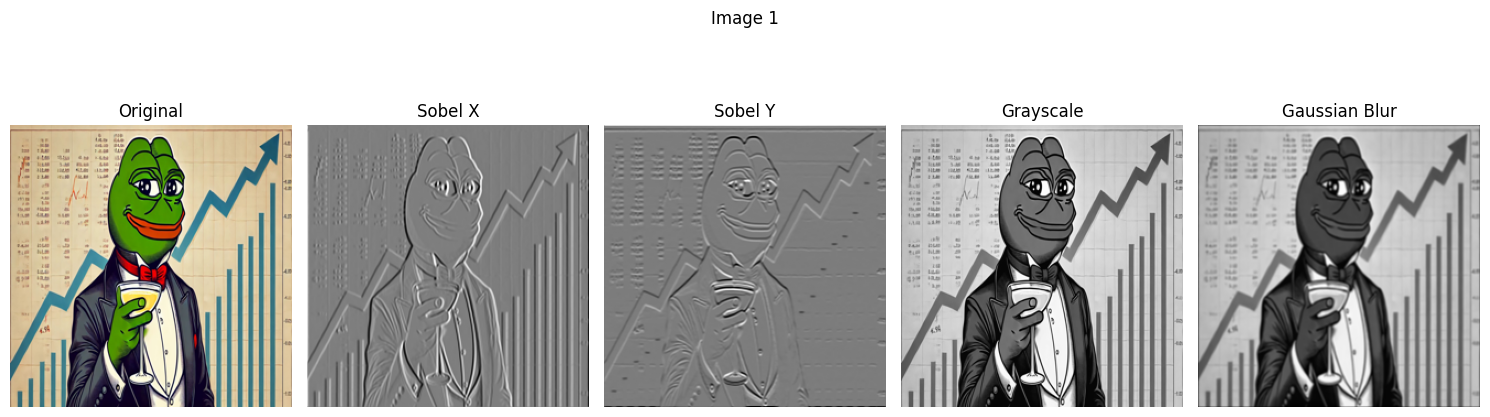

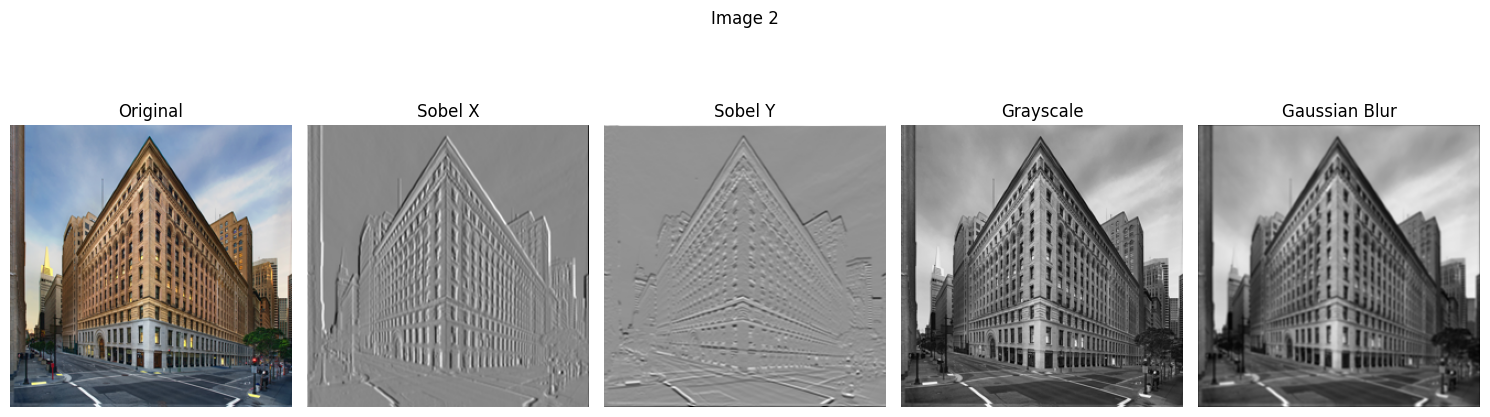

In [21]:
import matplotlib.pyplot as plt

titles = ['Original', 'Sobel X', 'Sobel Y', 'Grayscale', 'Gaussian Blur']

for i in range(2):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 5, 1)
    plt.imshow(x[i].transpose(1, 2, 0).astype(np.uint8))
    plt.title(titles[0])
    plt.axis('off')

    for j in range(4):
        plt.subplot(1, 5, j + 2)
        img = out[i, j]
        plt.imshow(img, cmap='gray')
        plt.title(titles[j + 1])
        plt.axis('off')

    plt.suptitle(f"Image {i + 1}")
    plt.tight_layout()
    plt.show()
